# Final Report
Carli Lessard and Men Cheol Jeong  
clessard6 and mjeong42

## Step 1
Answer the following questions in the final project report:
* Which dataset did you select?
Census Income Data Set [link here](https://archive.ics.uci.edu/ml/datasets/census+income)
* Which regulated domain does your dataset belong to?
This dataset was chosen because it could be used for the protected domains of education and employment
* How many observations are in the dataset?
48842
* How many variables in the dataset?
14
* Which variables did you select as your dependent variables?
Workclass and education
* How many and which variables in the dataset are associated with a legally recognized protected class? Which legal precedence/law (as discussed in the lectures)does each protected class fall under?
5 variables are associated with a legally recognized protected class.
1. age: Age Discrimination in Employment Act of 1967
2. marital status: Civil Rights Act of 1968
3. race: Civil Rights Act of 1964, 1991
4. sex: Equal Pay Act of 1963; Civil Rights Act of 1964, 1991
5. native-country: Civil Rights Act of 1964, 1991

## Step 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import DisparateImpactRemover, Reweighing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv(
    "adult.data", 
    header=None, 
    names= ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "more_or_less_50"])

In [3]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,more_or_less_50
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.loc[df.age < 40, "age_category"] = 0
df.loc[df.age >= 40, "age_category"] = 1

### Age
| Age values | Category     |
| ---------- | ------------ |
| 0-39       | 0 (Under 40) |
| 40+        | 1 (Over 40)  |


In [5]:
for value, category in [
    (" Married-civ-spouse", 0 ),
    (" Married-AF-spouse", 1),
    (" Widowed", 1),
    (" Separated", 1),
    (" Divorced", 1),
    (" Married-spouse-absent", 1),
    (" Never-married", 1)]:
    df.loc[df.marital_status == value, 'marital_category'] = category

### Marital status
| Marital status value  | Category |
| --------------------- | -------- |
| Married-civ-spouse    | 0 (Spouse present) |
| Divorced              | 1   (Spouse absent)      |
| Never-married        | 1   (Spouse absent)      |
| Separated            | 1   (Spouse absent)      |
| Widowed              | 1   (Spouse absent)      |
| Married-spouse-absent | 1   (Spouse absent)      |
| Married-AF-spouse | 1   (Spouse absent)      |

In [6]:
for value, category in [
    (" White", 0 ),
    (" Asian-Pac-Islander", 1),
    (" Amer-Indian-Eskimo", 1),
    (" Other", 1),
    (" Black", 1),]:
    df.loc[df.race == value, 'race_category'] = category

### Race
| Race value         | Category |
| ------------------ | -------- |
| White              | 0 (White)       |
| Asian-Pac-Islander | 1 (Not white)       |
| Amer-Indian-Eskimo | 1 (Not white)       |
| Other              | 1  (Not white)      |
| Black              | 1  (Not white)      |

In [7]:
df.loc[df.sex == " Male", "sex_category"] = 0
df.loc[df.sex == " Female", "sex_category"] = 1

### Sex
| Sex value    | Category |
| ------ | ----------- |
| Male   | 0  (Male)      |
| Female | 1   (Female)   |

In [8]:
df.loc[df.native_country == " United-States", "country_category"] = 0
df.loc[df.native_country != " United-States", "country_category"] = 1

### Native country
| Native Country | Category |
| -------------- | ----------- |
| United-States  | 0 (US) |
| Canada, Outlying-US(Guam-USVI-etc), Jamaica , Mexico,  Dominican-Republic, Haiti, England, Germany, Greece, Italy, Poland, Portugal, Ireland, France, Hungary, Scotland, Yugoslavia, Holand-Netherlands, Puerto-Rico, Honduras, Guatemala, Nicaragua, El-Salvador, Ecuador, Columbia, Trinadad&Tobago, Peru, Cambodia, India, Japan, China, Philippines, Vietnam, Laos, Taiwan, Thailand, Hong, Iran, South | 1 (Other)        |

In [9]:
for value, category in [
    (' Bachelors', 0),
    (' HS-grad', 0),
    (' Masters', 0),
    (' Some-college', 0),
    (' Assoc-acdm', 0),
    (' Assoc-voc', 0),
    (' Doctorate', 0),
    (' Prof-school', 0),
    (' 11th', 1),
    (' 9th', 1),
    (' 7th-8th', 1),
    (' 5th-6th', 1),
    (' 10th', 1),
    (' 1st-4th', 1),
    (' Preschool', 1),
    (' 12th', 1),]:
    df.loc[df.education == value, 'education_category'] = category

### Education
| Education                                                                                | Category                         |
| ---------------------------------------------------------------------------------------- | -------------------------------- |
| Bachelors, Some-college, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate | Graduates High School (0)        |
| 11th, 9th, 7th-8th, 12th, 1st-4th, 10th, 5th-6th, Preschool                              | Doesn't Graduate High School (1) |

In [103]:
for value, category in [
    (' Adm-clerical', 0),
    (' Exec-managerial', 0),
    (' Prof-specialty', 0),
    (' Sales', 0),
    (' Tech-support', 0),
    (' Handlers-cleaners', 1),
    (' Other-service', 1),
    (' Craft-repair', 1),
    (' Transport-moving', 1),
    (' Farming-fishing', 1),
    (' Machine-op-inspct', 1),
    (' ?', 1),
    (' Protective-serv', 1),
    (' Armed-Forces', 1),
    (' Priv-house-serv', 1),]:
    df.loc[df.occupation == value, 'job_category'] = category

### Job Category
| Occupation    | Category |
| ------ | ----------- |
| Tech-support, Sales, Exec-managerial, Prof-specialty, Adm-clerical | White Collar (0) |
| Craft-repair, Other-service, Handlers-cleaners, Machine-op-inspct, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces | Blue Collar (1) |


In [11]:
age_education = df.groupby(['age_category', 'education_category']).size()
age_education.reset_index(name='counts')

,age_category,education_category,counts
0,0.0,0.0,15926
1,0.0,1.0,2398
2,1.0,0.0,12382
3,1.0,1.0,1855


In [12]:
marital_education = df.groupby(['marital_category', 'education_category']).size()
marital_education.reset_index(name='counts')

,marital_category,education_category,counts
0,0.0,0.0,13281
1,0.0,1.0,1695
2,1.0,0.0,15027
3,1.0,1.0,2558


In [13]:
race_education = df.groupby(['race_category', 'education_category']).size()
race_education.reset_index(name='counts')

,race_category,education_category,counts
0,0.0,0.0,24335
1,0.0,1.0,3481
2,1.0,0.0,3973
3,1.0,1.0,772


In [14]:
sex_education = df.groupby(['sex_category', 'education_category']).size()
sex_education.reset_index(name='counts')

,sex_category,education_category,counts
0,0.0,0.0,18858
1,0.0,1.0,2932
2,1.0,0.0,9450
3,1.0,1.0,1321


In [15]:
country_education = df.groupby(['country_category', 'education_category']).size()
country_education.reset_index(name='counts')

,country_category,education_category,counts
0,0.0,0.0,25836
1,0.0,1.0,3334
2,1.0,0.0,2472
3,1.0,1.0,919


In [16]:
age_job = df.groupby(['age_category', 'job_category']).size()
age_job.reset_index(name='counts')

,age_category,job_category,counts
0,0.0,0.0,8838
1,0.0,1.0,9486
2,1.0,0.0,7716
3,1.0,1.0,6521


In [17]:
marital_job = df.groupby(['marital_category', 'job_category']).size()
marital_job.reset_index(name='counts')

,marital_category,job_category,counts
0,0.0,0.0,7623
1,0.0,1.0,7353
2,1.0,0.0,8931
3,1.0,1.0,8654


In [18]:
race_job = df.groupby(['race_category', 'job_category']).size()
race_job.reset_index(name='counts')

,race_category,job_category,counts
0,0.0,0.0,14424
1,0.0,1.0,13392
2,1.0,0.0,2130
3,1.0,1.0,2615


In [19]:
sex_job = df.groupby(['sex_category', 'job_category']).size()
sex_job.reset_index(name='counts')

,sex_category,job_category,counts
0,0.0,0.0,9732
1,0.0,1.0,12058
2,1.0,0.0,6822
3,1.0,1.0,3949


In [20]:
country_job = df.groupby(['country_category', 'job_category']).size()
country_job.reset_index(name='counts')

,country_category,job_category,counts
0,0.0,0.0,15091
1,0.0,1.0,14079
2,1.0,0.0,1463
3,1.0,1.0,1928


In [33]:
df.loc[df.more_or_less_50 == ' <=50K', 'more_less_50_bin'] = 0
df.loc[df.more_or_less_50 == ' >50K', 'more_less_50_bin'] = 1

<AxesSubplot:title={'center':'Count of Education Categories by Age'}, xlabel='age_category'>

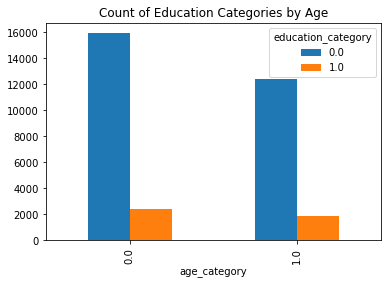

In [93]:
age_education_plot = age_education.unstack().plot(kind="bar")
age_education_plot.set_title('Count of Education Categories by Age')
age_education_plot

<AxesSubplot:title={'center':'Count of Education Categories by Marital Status'}, xlabel='marital_category'>

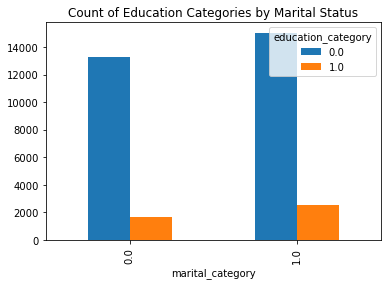

In [94]:
marital_education_plot = marital_education.unstack().plot(kind="bar")
marital_education_plot.set_title('Count of Education Categories by Marital Status')
marital_education_plot

<AxesSubplot:title={'center':'Count of Education Categories by Race'}, xlabel='race_category'>

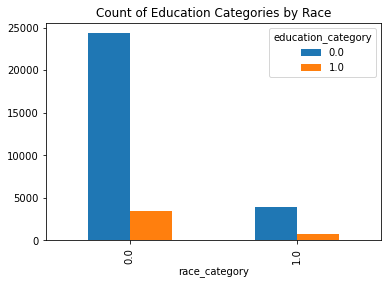

In [95]:
race_education_plot = race_education.unstack().plot(kind="bar")
race_education_plot.set_title('Count of Education Categories by Race')
race_education_plot

<AxesSubplot:title={'center':'Count of Education Categories by Sex'}, xlabel='sex_category'>

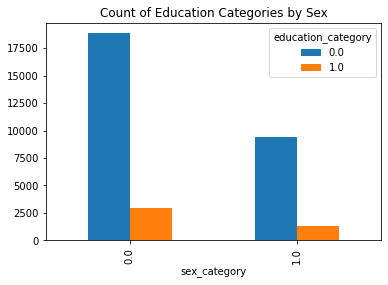

In [96]:
sex_education_plot = sex_education.unstack().plot(kind="bar")
sex_education_plot.set_title('Count of Education Categories by Sex')
sex_education_plot

<AxesSubplot:title={'center':'Count of Education Categories by Native Country'}, xlabel='country_category'>

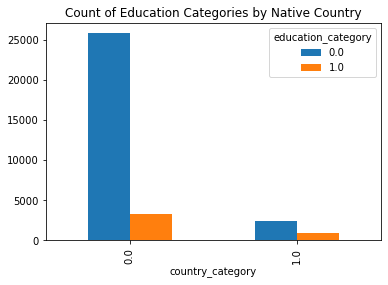

In [97]:
country_education_plot = country_education.unstack().plot(kind="bar")
country_education_plot.set_title('Count of Education Categories by Native Country')
country_education_plot

<AxesSubplot:title={'center':'Count of Job Categories by Age'}, xlabel='age_category'>

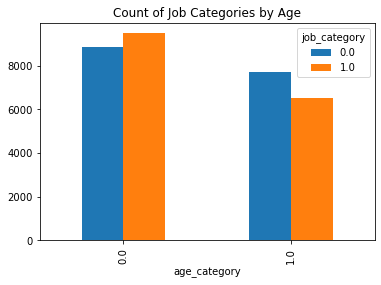

In [98]:
age_job_plot = age_job.unstack().plot(kind="bar")
age_job_plot.set_title('Count of Job Categories by Age')
age_job_plot

<AxesSubplot:title={'center':'Count of Job Categories by Marital Status'}, xlabel='marital_category'>

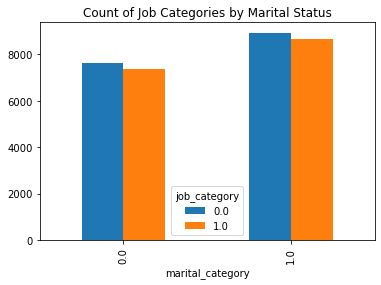

In [99]:
marital_job_plot = marital_job.unstack().plot(kind="bar")
marital_job_plot.set_title('Count of Job Categories by Marital Status')
marital_job_plot

<AxesSubplot:title={'center':'Count of Job Categories by Race'}, xlabel='race_category'>

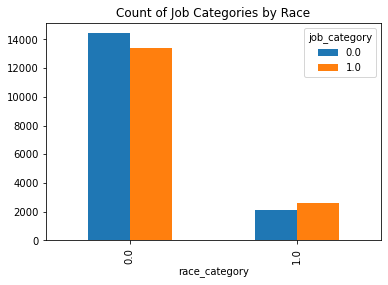

In [100]:
race_job_plot = race_job.unstack().plot(kind="bar")
race_job_plot.set_title('Count of Job Categories by Race')
race_job_plot

<AxesSubplot:title={'center':'Count of Job Categories by Sex'}, xlabel='sex_category'>

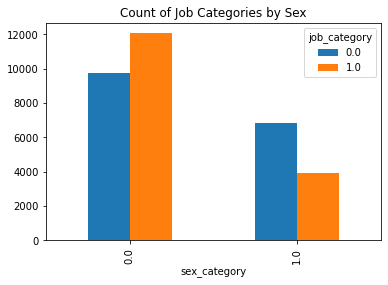

In [101]:
sex_job_plot = sex_job.unstack().plot(kind="bar")
sex_job_plot.set_title('Count of Job Categories by Sex')
sex_job_plot

<AxesSubplot:title={'center':'Count of Job Categories by Native Country'}, xlabel='country_category'>

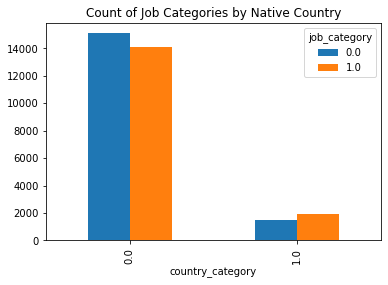

In [102]:
country_job_plot = country_job.unstack().plot(kind="bar")
country_job_plot.set_title('Count of Job Categories by Native Country')
country_job_plot

### Step 3
The privileged group for the Education variable is having a high school diploma, and the unprivileged group is not finishing high school. This corresponds to a privileged group of 0 and unprivileged group of 1 in our data set.   
The privileged group for the Job variable is the White-Collar group, and the unprivileged group is the Blue-Collar group. This corresponds to a privileged group of 0 and unprivileged group of 1 in our data set.  

The two fairness metrics we chose to calculate are Disparate Impact and Statistical Parity Difference.  

The bias mitigation algorithm we chose to use was the Reweighing algorithm. 

Below are the calculations for the two statistics before bias mitigation and after for each combination of protected class variable and dependent variable.

#### Education - Age

In [34]:
def run_fairness(
    protected_category='age_category',
    privileged_classes=[lambda x: x == 1],
    privileged_groups=[{'age_category': 1}],
    unprivileged_groups=[{'age_category': 0}],
    depedent_category='education_category',
    favorable_value=0,
):
    def favorable(x):
        if x == favorable_value:
            return True
        else:
            return False
    
    sd = StandardDataset(
        df=df,
        label_name=depedent_category,
        favorable_classes=favorable,
        protected_attribute_names=[protected_category],
        privileged_classes=privileged_classes,
        features_to_keep=[
            depedent_category,
            protected_category,
            'more_less_50_bin',
            'hours_per_week',
            'capital_gain',
            'capital_loss',
        ]
    )
    metrics = BinaryLabelDatasetMetric(
        sd,
        privileged_groups=privileged_groups,
        unprivileged_groups=unprivileged_groups
    )
    print("Original SPD: {}".format(metrics.statistical_parity_difference()))
    print("Original DI: {}".format(metrics.disparate_impact()))
    disp_ir = Reweighing(
        unprivileged_groups, privileged_groups,
    ).fit_transform(sd)
    new_metrics = BinaryLabelDatasetMetric(disp_ir, 
                                               unprivileged_groups=unprivileged_groups,
                                               privileged_groups=privileged_groups)
    print("New SPD: {}".format(new_metrics.statistical_parity_difference()))
    print("New DI: {}".format(new_metrics.disparate_impact()))
    

In [35]:
run_fairness(
    protected_category='age_category',
    privileged_classes=[lambda x: x == 0],
    privileged_groups=[{'age_category': 0}],
    unprivileged_groups=[{'age_category': 1}],
    depedent_category='education_category',
    favorable_value=0)

Original SPD: -0.000572319432885382
Original DI: 0.9993419389625271
New SPD: 2.220446049250313e-16
New DI: 1.0000000000000002


##### Protected class - Age
Privileged group: <40  
Unprivileged group: >40

##### Fairness Metrics
| Statistic                     | Before Bias Mitigation |  After Bias Mitigation |
| ----------------------------- | ---------------------- | ---------------------- |
| Statistical Parity Difference | -0.000572319432885382  | 2.220446049250313e-16  |
| Disparate Impact              | 0.9993419389625271     | 1.0000000000000002     |

#### Education - Marital

In [36]:
run_fairness(
    protected_category='marital_category',
    privileged_classes=[lambda x: x == 0],
    privileged_groups=[{'marital_category': 0}],
    unprivileged_groups=[{'marital_category': 1}],
    depedent_category='education_category',
    favorable_value=0)

Original SPD: 0.03228379510144863
Original DI: 1.0377793662646553
New SPD: 2.220446049250313e-16
New DI: 1.0000000000000002


##### Protected class - Marital status
Privileged group: Married  
Unprivileged group: Not Married

##### Fairness Metrics
| Statistic                     | Before Bias Mitigation |  After Bias Mitigation |
| ----------------------------- | ---------------------- | ---------------------- |
| Statistical Parity Difference | 0.03228379510144863    | 2.220446049250313e-16  |
| Disparate Impact              | 1.0377793662646553     | 1.0000000000000002     |

#### Education - Race

In [37]:
run_fairness(
    protected_category='race_category',
    privileged_classes=[lambda x: x == 0],
    privileged_groups=[{'race_category': 0}],
    unprivileged_groups=[{'race_category': 1}],
    depedent_category='education_category',
    favorable_value=0)

Original SPD: 0.03755377426793505
Original DI: 1.0448509083567459
New SPD: -1.1102230246251565e-16
New DI: 0.9999999999999999


##### Protected class - Race
Privileged group: White  
Unprivileged group: Not White

##### Fairness Metrics
| Statistic                     | Before Bias Mitigation |  After Bias Mitigation  |
| ----------------------------- | ---------------------- | ----------------------- |
| Statistical Parity Difference | 0.03755377426793505    | -1.1102230246251565e-16 |
| Disparate Impact              | 1.0448509083567459     | 0.9999999999999999      |

#### Education - Sex

In [38]:
run_fairness(
    protected_category='sex_category',
    privileged_classes=[lambda x: x == 0],
    privileged_groups=[{'sex_category': 0}],
    unprivileged_groups=[{'sex_category': 1}],
    depedent_category='education_category',
    favorable_value=0)

Original SPD: -0.011912999266425417
Original DI: 0.986421702105961
New SPD: 2.220446049250313e-16
New DI: 1.0000000000000002


##### Protected class - Sex
Privileged group: Male  
Unprivileged group: Female

##### Fairness Metrics
| Statistic                     | Before Bias Mitigation |  After Bias Mitigation |
| ----------------------------- | ---------------------- | ---------------------- |
| Statistical Parity Difference | -0.011912999266425417  | 2.220446049250313e-16  |
| Disparate Impact              | 0.986421702105961      | 1.0000000000000002     |

#### Education - Native Country

In [39]:
run_fairness(
    protected_category='country_category',
    privileged_classes=[lambda x: x == 0],
    privileged_groups=[{'country_category': 0}],
    unprivileged_groups=[{'country_category': 1}],
    depedent_category='education_category',
    favorable_value=0)

Original SPD: 0.15671599194746788
Original DI: 1.2149773174327927
New SPD: -2.220446049250313e-16
New DI: 0.9999999999999998


##### Protected class - Native country
Privileged group: United States  
Unprivileged group: Not United States

##### Fairness Metrics
| Statistic                     | Before Bias Mitigation |  After Bias Mitigation |
| ----------------------------- | ---------------------- | ---------------------- |
| Statistical Parity Difference | 0.15671599194746788    | -2.220446049250313e-16 |
| Disparate Impact              | 1.2149773174327927     | 0.9999999999999998     |

#### Job - Age

In [40]:
run_fairness(
    protected_category='age_category',
    privileged_classes=[lambda x: x == 0],
    privileged_groups=[{'age_category': 0}],
    unprivileged_groups=[{'age_category': 1}],
    depedent_category='job_category',
    favorable_value=0
)

Original SPD: -0.05964984013955166
Original DI: 0.889938468887144
New SPD: 0.0
New DI: 1.0


##### Protected class - Age
Privileged group: <40  
Unprivileged group: >40

##### Fairness Metrics
| Statistic                     | Before Bias Mitigation |  After Bias Mitigation |
| ----------------------------- | ---------------------- | ---------------------- |
| Statistical Parity Difference | -0.05964984013955166   | 0.0                    |
| Disparate Impact              | 0.889938468887144      | 1.0                    |

#### Job - Marital

In [41]:
run_fairness(
    protected_category='marital_category',
    privileged_classes=[lambda x: x == 0],
    privileged_groups=[{'marital_category': 0}],
    unprivileged_groups=[{'marital_category': 1}],
    depedent_category='job_category',
    favorable_value=0
)

Original SPD: 0.0011383923689333164
Original DI: 1.0022414768567565
New SPD: 2.220446049250313e-16
New DI: 1.0000000000000004


##### Protected class - Marital status
Privileged group: Married  
Unprivileged group: Not married

##### Fairness Metrics
| Statistic                     | Before Bias Mitigation |  After Bias Mitigation |
| ----------------------------- | ---------------------- | ---------------------- |
| Statistical Parity Difference | 0.0011383923689333164  | 2.220446049250313e-16  |
| Disparate Impact              | 1.0022414768567565     | 1.0000000000000004     |

#### Job - Race

In [42]:
run_fairness(
    protected_category='race_category',
    privileged_classes=[lambda x: x == 0],
    privileged_groups=[{'race_category': 0}],
    unprivileged_groups=[{'race_category': 1}],
    depedent_category='job_category',
    favorable_value=0
)

Original SPD: 0.06965690236577987
Original DI: 1.1551746486974768
New SPD: 2.220446049250313e-16
New DI: 1.0000000000000004


##### Protected class - Race
Privileged group: White  
Unprivileged group: Not white

##### Fairness Metrics
| Statistic                     | Before Bias Mitigation |  After Bias Mitigation |
| ----------------------------- | ---------------------- | ---------------------- |
| Statistical Parity Difference | 0.06965690236577987    | 2.220446049250313e-16  |
| Disparate Impact              | 1.1551746486974768     | 1.0000000000000004     |

#### Job - Sex

In [43]:
run_fairness(
    protected_category='sex_category',
    privileged_classes=[lambda x: x == 0],
    privileged_groups=[{'sex_category': 0}],
    unprivileged_groups=[{'sex_category': 1}],
    depedent_category='job_category',
    favorable_value=0
)

Original SPD: -0.1867404822895466
Original DI: 0.7051624545967888
New SPD: -2.220446049250313e-16
New DI: 0.9999999999999996


##### Protected class - Sex
Privileged group: Male  
Unprivileged group: Female

##### Fairness Metrics
| Statistic                     | Before Bias Mitigation |  After Bias Mitigation |
| ----------------------------- | ---------------------- | ---------------------- |
| Statistical Parity Difference | -0.1867404822895466    | -2.220446049250313e-16 |
| Disparate Impact              | 0.7051624545967888     | 0.9999999999999996     |

#### Job - Native Country

In [44]:
run_fairness(
    protected_category='country_category',
    privileged_classes=[lambda x: x == 0],
    privileged_groups=[{'country_category': 0}],
    unprivileged_groups=[{'country_category': 1}],
    depedent_category='job_category',
    favorable_value=0
)

Original SPD: 0.0859104344345733
Original DI: 1.1991266460475996
New SPD: -1.1102230246251565e-16
New DI: 0.9999999999999998


##### Protected class - Native country
Privileged group: United States  
Unprivileged group: Not United States

##### Fairness Metrics
| Statistic                     | Before Bias Mitigation |  After Bias Mitigation  |
| ----------------------------- | ---------------------- | ----------------------- |
| Statistical Parity Difference | 0.0859104344345733     | -1.1102230246251565e-16 |
| Disparate Impact              | 1.1991266460475996     | 0.9999999999999998      |

### Step 4
#### Option A
The dependent variable we chose to use was jobs. The privileged group is white collar jobs (0), and the unprivileged group is blue collar jobs (1).  
The protected class variable we chose to use was sex.

In [45]:
protected_category='sex_category'
privileged_classes=[lambda x: x == 0]
privileged_groups=[{'sex_category': 0}]
unprivileged_groups=[{'sex_category': 1}]
depedent_category='job_category'
favorable_value=0
def favorable(x):
    if x == favorable_value:
        return True
    else:
        return False
sd = StandardDataset(
    df=df,
    label_name=depedent_category,
    favorable_classes=favorable,
    protected_attribute_names=[protected_category],
    privileged_classes=privileged_classes,
    features_to_keep=[
        depedent_category,
        protected_category,
        'more_less_50_bin',
        'hours_per_week',
        'capital_gain',
        'capital_loss',
    ]
)
sd_rw = Reweighing(
        unprivileged_groups, privileged_groups,
    ).fit_transform(sd)

# Split both original and transformeddata into training and testing sets
dataset_orig_train, dataset_orig_test = sd.split([0.7], shuffle=True)
dataset_rw_train, dataset_rw_test = sd_rw.split([0.7], shuffle=True)

In [46]:
# Logistic regression classifier and predictions
# Referenced https://github.com/IBM/AIF360/blob/master/examples/demo_reweighing_preproc.ipynb for training code
scale_orig = StandardScaler()
X_train = scale_orig.fit_transform(dataset_orig_train.features)
y_train = dataset_orig_train.labels.ravel()
w_train = dataset_orig_train.instance_weights.ravel()

lmod = LogisticRegression()
lmod.fit(X_train, y_train, 
         sample_weight=dataset_orig_train.instance_weights)
scale2 = StandardScaler()
X_test = scale2.fit_transform(dataset_orig_test.features)
y_train_pred = lmod.predict(X_test)

# positive class index
pos_ind = np.where(lmod.classes_ == dataset_orig_train.favorable_label)[0][0]

dataset_orig_test_pred = dataset_orig_test.copy()
y_train_pred.shape = dataset_orig_test.labels.shape
dataset_orig_test.labels = y_train_pred

In [47]:
# Now run metrics on dataset_orig_train_pred?
metrics = BinaryLabelDatasetMetric(
    dataset_orig_test_pred,
    privileged_groups=privileged_groups,
    unprivileged_groups=unprivileged_groups
)
print("Original SPD: {}".format(metrics.statistical_parity_difference()))
print("Original DI: {}".format(metrics.disparate_impact()))

Original SPD: -0.19192260899643776
Original DI: 0.6969593158047362


In [48]:
# Logistic regression classifier and predictions
scale_orig = StandardScaler()
X_train = scale_orig.fit_transform(dataset_rw_train.features)
y_train = dataset_rw_train.labels.ravel()
w_train = dataset_orig_train.instance_weights.ravel()

lmod = LogisticRegression()
lmod.fit(X_train, y_train, 
         sample_weight=dataset_rw_train.instance_weights)
scale2 = StandardScaler()
X_test = scale_orig.fit_transform(dataset_rw_test.features)
y_train_pred = lmod.predict(X_test)

# positive class index
pos_ind = np.where(lmod.classes_ == dataset_rw_train.favorable_label)[0][0]

dataset_rw_test_pred = dataset_rw_test.copy()
y_train_pred.shape = dataset_rw_test.labels.shape
dataset_rw_test_pred.labels = y_train_pred

In [49]:
# Now run metrics on dataset_rw_train_pred?
new_metrics = BinaryLabelDatasetMetric(dataset_rw_test_pred, 
               unprivileged_groups=unprivileged_groups,
               privileged_groups=privileged_groups
)
print("New SPD: {}".format(new_metrics.statistical_parity_difference()))
print("New DI: {}".format(new_metrics.disparate_impact()))

New SPD: 0.08937834560831542
New DI: 1.3552660072981788


Privileged Group: Male
Unprivileged Group: Female

Dependent Variable: Job category, i.e. white collar and blue collar

| Statistic                     | No Bias Mitigation |  After Bias Mitigation | Change |
| ----------------------------- | ---------------------- | ---------------------- | - |
| Statistical Parity Difference | -0.1867    | -2.2e-16 | Positive | 
| Disparate Impact              | 0.7052     | 0.9999     | Positive | 

| Statistic  |  Predicted No Bias Mitigation | Predicted After Bias Mitigation | Change |
| - | - | - | - |
| Statistical Parity Difference | -0.1819  | 0.0990  | Positive |
| Disparate Impact              | 0.7094     | 1.415     | Negative |



### Step 5

Members: Carli Lessard, Men Cheol Jeong

(graphs are below)
In this case, where we are trying to predict whether someone will are in a blue collar or white collar job, we expect no difference between men and women with a fair model. Thus, we should optimize for mean difference. 

**Men Cheol's response:**  
Yes, the approach seems to work in mitigate some bias. That is, the statistical parity difference was improved positively. However, we were unable to improve disparate impact. Our transformed model gave a positive advantage to the Female group. The transformed model disadvantaged the female group. Bias-mitigated models are only as good as the people that use them. If an employer were to use this model to predict whether someone was a good fit for their job, they should consider whether such a model feeds in a self-fulfilling prophecy. For example, this model uses Census data which may highlight high income subgroups as good fits for white collar jobs, enforcing existing biases 


**Carli's response:**  
Did any of these approaches seems to work to mitigate bias (or increase fairness)? Explain your reasoning.  
Yes, the reweighing bias mitigation seemed to have worked for Statistical Parity Difference at least. The values after the transformation were significantly closer to zero than the values before. For Disparate Impact, the reweighing also seemed to work everywhere expect on our predicted values. For our predictions, the statistic increased from 0.7 to 1.4, switching which group receives a positive advantage.

Did any group receive a positive advantage?  
In looking at our data from step 4 for Disparate Impact, after bias mitigation, females receive a positive advantage. Prior to the mitigation, males had a positive advantage. We can tell because the value is less than 1 before the mitigation, and higher than 1 after. 

Was any group disadvantaged by these approaches?  
Again, looking at step 4, males would be disadvanted using these approaches to predict job category. After the bias mitigation, the model favors women for white collar jobs. 

What issues would arise if you used these methods to mitigate bias?  
If we used these methods to mitigate bias in the real world, we would have to be careful with how we apply these models. Using this model would favor women over men for white collar jobs. Depending on the job, this could potentially propagate other biases about what women or men should be doing. For example the jobs for executive assistants or secretaries are primarily dominated by women, and this model could continue to propagate that trend since those jobs are considered "white collar".

0.6969593158047362

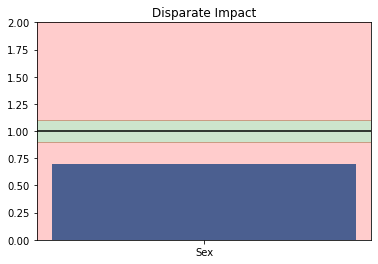

In [50]:
# Step 5:
plt.clf()
ax = plt.bar(['Sex'], [metrics.disparate_impact()], )
plt.ylim(0, 2)
plt.axhline(y = 1, c='black')
plt.axhspan(0.9, 1.1, color='green', alpha=0.2)
plt.axhspan(1.1, 2, color='red', alpha=0.2)
plt.axhspan(0, 0.9, color='red', alpha=0.2)
plt.title('Disparate Impact')
metrics.disparate_impact()

1.0

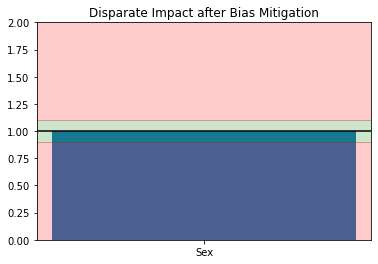

In [104]:
# Step 5:
ax = plt.bar(['Sex'], [new_metrics.disparate_impact()], )
plt.ylim(0, 2)
plt.axhline(y = 1, c='black')
plt.axhspan(0.9, 1.1, color='green', alpha=0.2)
plt.axhspan(1.1, 2, color='red', alpha=0.2)
plt.axhspan(0, 0.9, color='red', alpha=0.2)
plt.title('Disparate Impact after Bias Mitigation')
new_metrics.disparate_impact()

-0.19192260899643776

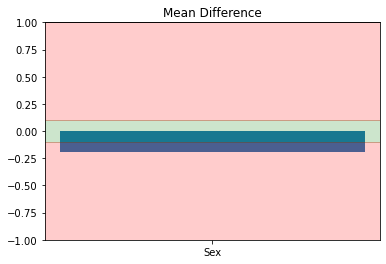

In [52]:
plt.clf()
plt.bar(['Sex'], [metrics.mean_difference()])
plt.ylim(-1, 1)
plt.axhline(y = 1, c='black')
plt.axhspan(-0.1, 0.1, color='green', alpha=0.2)
plt.axhspan(0.1, 1, color='red', alpha=0.2)
plt.axhspan(-1, -0.1, color='red', alpha=0.2)
plt.title('Mean Difference')
metrics.mean_difference()

0.0

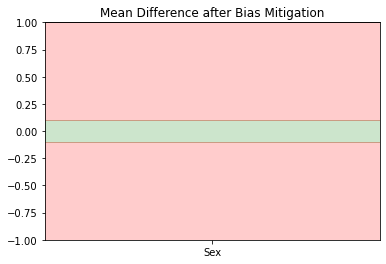

In [105]:
plt.clf()
plt.bar(['Sex'], [new_metrics.mean_difference()])
plt.ylim(-1, 1)
plt.axhline(y = 1, c='black')
plt.axhspan(-0.1, 0.1, color='green', alpha=0.2)
plt.axhspan(0.1, 1, color='red', alpha=0.2)
plt.axhspan(-1, -0.1, color='red', alpha=0.2)
plt.title('Mean Difference after Bias Mitigation')
new_metrics.mean_difference()